## Shweta Shinde
## Movie Recomendation System

##### Step1 :- Loading the file.

In [65]:
import pandas as pd

# Read CSV file
Movies = pd.read_csv(r"F:/Main_file.csv")  

# Check the first few rows
Movies.head()

,genre,category,title,year,distribution,description,url,cover_photo
0,Sci-Fi,Hollywood,Doctor Strange in the Multiverse of Madness,2022,BluRay,Dr. Stephen Strange casts a forbidden spell th...,https://fzmovies.net/movie-Doctor%20Strange%20...,https://fzmovies.net/imdb_images/Doctor.Strang...
1,Drama,Hollywood,The Proposal,2009,BluRay,"For three years, Andrew Paxton has slaved as t...",https://fzmovies.net/movie-The%20Proposal--hmp...,https://fzmovies.net/imdb_images/The%20Proposa...
2,Crime,Hollywood,District B13,2004,BluRay,"In the near future, the worst ghettos of Paris...",https://fzmovies.net/movie-District%20B13--hmp...,https://fzmovies.net/imdb_images/District.B13....
3,Crime,Hollywood,Transfusion,2023,BluRay,A former Special Forces operative thrust into ...,https://fzmovies.net/movie-Transfusion--hmp4.htm,https://fzmovies.net/imdb_images/Transfusion.2...
4,Crime,Hollywood,The Out Laws,2023,BluRay,A straight-laced bank manager about to marry t...,https://fzmovies.net/movie-The%20Out%20Laws--h...,https://fzmovies.net/imdb_images/The.Out.Laws....


##### Step 2 - Analyze the dataset
##### **nunique** is to understand the diversity of the data.
##### Also, To check if a column has a lot of repeated values.

In [66]:
Movies.nunique()

genre            11
category          1
title           465
year             41
distribution      7
description     493
url             465
cover_photo     465
dtype: int64

In [74]:
print(f"Column: genre")
print(Movies['genre'].value_counts(), "\n")

Column: genre
genre
Crime        71
Comedy       64
Sci-Fi       54
Adventure    50
Biography    47
Family       46
Animation    46
Horror       46
Romance      41
Drama        40
Action       39
Name: count, dtype: int64 



##### Step 3: Import all required labraries

In [76]:
#!pip install pandas scikit-learn sentence-transformers matplotlib Pillow requests
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

In [69]:
# Combine 'genre' and 'description' for better similarity matching
Movies["combined_features"] = (Movies["genre"] + " " + Movies["genre"] + " " + Movies["description"]).fillna("")

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Transform combined features into numerical vectors
tfidf_matrix = vectorizer.fit_transform(Movies["combined_features"])

# Example Prompts:

- I love romantic movies with heartwarming love stories and emotional depth.
- I enjoy fun animated movies with adventure, friendship, and family themes.
- I love thrilling action movies set in space, with a comedic twist.


Describe the type of movies you like:  I love thrilling action movies set in space, with a comedic twist.



Top Movie Recommendations:
Guardians of the Galaxy (2014) - Genre: Adventure
Avengers - Endgame (2019) - Genre: Action
Men in Black International (2019) - Genre: Sci-Fi

Hope you found a great movie to watch! 🎬🍿


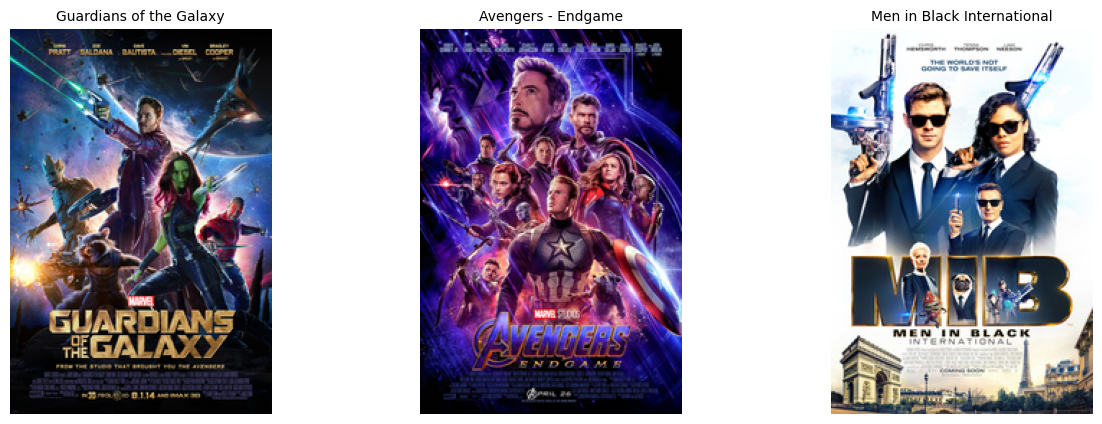

In [64]:
# Function to recommend movies
def recommend_movies(user_query, top_n=3):
    user_tfidf = vectorizer.transform([user_query])
    similarities = cosine_similarity(user_tfidf, tfidf_matrix).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return Movies.iloc[top_indices]


print("# Example Prompts:\n")
prompts = [
    "I love romantic movies with heartwarming love stories and emotional depth.",
    "I enjoy fun animated movies with adventure, friendship, and family themes.",
    "I love thrilling action movies set in space, with a comedic twist."
]

for prompt in prompts:
    print(f"- {prompt}")
    
# Take user input
user_input = input("Describe the type of movies you like: ")

# Get recommendations
recommended_movies = recommend_movies(user_input).drop_duplicates(subset=["title"])

# Display recommended movies
print("\nTop Movie Recommendations:")
for idx, row in recommended_movies.iterrows():
    print(f"{row['title']} ({row['year']}) - Genre: {row['genre']}")
print("\nHope you found a great movie to watch! 🎬🍿")

def display_movie_posters(recommended_movies):
    fig, axes = plt.subplots(1, len(recommended_movies), figsize=(15, 5))
    
    for i, ax in enumerate(axes):
        image_url = recommended_movies.iloc[i]["cover_photo"]
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))
        
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(recommended_movies.iloc[i]["title"], fontsize=10)
    
    plt.show()

# Show cover photos of recommended movies
display_movie_posters(recommended_movies)